In [232]:
#import igraph
#from igraph import *
import matplotlib.pyplot as plt
import networkx as nx



In [233]:
#g = nx.erdos_renyi_graph(10, 0.5)
#nx.write_gml(g, '/home/dheeraj/my_projects/my_project_env/practice/6th_sem_Academics/SocialNetworkAnalysis/HandsOn/Modeling_cascading/main_graph.gml')

In [234]:
#def set_all_B(g):
#    for each in g.nodes():
#        g.nodes[each]['action'] = 'B'

In [235]:
#def set_A(g, list1):
#    for each in list1:
#        g.nodes[each]['action'] ='A'

In [236]:
def get_colors(g):
    list1=[]
    for each in g.nodes():
        if g.nodes[each]['action']=='B':
            list1.append('red')
        else:
            list1.append('green')
    return list1

In [237]:
def find_neigh(each, c, g):
    num=0
    for each1 in g.neighbors(each):
        if g.nodes[each1]['action']==c:
            num=num+1
    return num

In [238]:
def recalculate_options(g):
    dict1= {}
    #Payoff(A) =a=4
    #Payoff(B) =b=3
    a=4
    b=3
    for each in g.nodes():
        num_A = find_neigh(each, 'A', g)
        num_B = find_neigh(each, 'B', g)
        payoff_A=a*num_A
        payoff_B=b*num_B
        if payoff_A >= payoff_B:
            dict1[each]='A'
        else:
            dict1[each]= 'B'
    return dict1
    
    
    

In [239]:
def reset_node_attributes(g, action_dict):
    for each in action_dict:
        g.nodes[each]['action']= action_dict[each]

In [240]:
#g = nx.read_gml('/home/dheeraj/my_projects/my_project_env/practice/6th_sem_Academics/SocialNetworkAnalysis/HandsOn/Modeling_cascading/main_graph.gml')

In [241]:
#nx.draw(g, with_labels=True)

In [242]:
#set_all_B(g)

In [243]:
#list1=[2,5]

In [244]:
#colors= get_colors(g)

In [245]:
#nx.draw(g, node_color = colors, node_size=800, with_labels=True)
#plt.show()

In [267]:
g = nx.erdos_renyi_graph(10, 0.5)

In [261]:
#g = nx.parse_edgelist('/home/dheeraj/my_projects/my_project_env/practice/6th_sem_Academics/SocialNetworkAnalysis/HandsOn/Modeling_cascading/mygraph.csv')

In [268]:

action1 = "A"
action2 = "B"
for each in g.nodes():
    g.nodes[each]['action'] = action2

In [269]:
list1 = [3,7]

In [270]:
for each in list1:
    g.nodes[each]['action'] = action1 

In [271]:
g.nodes[3]

{'action': 'A'}

In [272]:
colors = get_colors(g)

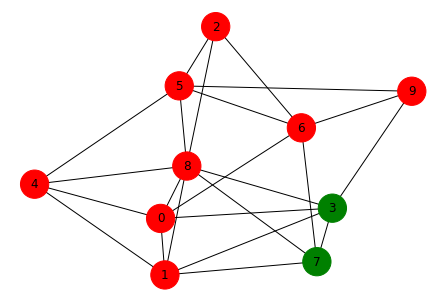

In [273]:
nx.draw(g,node_color= colors , node_size=800,with_labels=True)
plt.show()

In [274]:

action_dict  = recalculate_options(g)


In [275]:
reset_node_attributes(g, action_dict)

In [276]:
colors = get_colors(g)

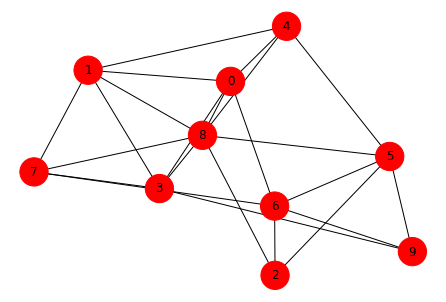

In [277]:
nx.draw(g,node_color= colors , node_size=800,with_labels=True)
plt.show()